In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

In [3]:
data_train = pd.read_csv(TRAIN_DATASET_PATH)
data_train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [5]:
data_train.iloc[0]

Id                        0.0
age                      40.0
years_of_experience       0.0
lesson_price           1400.0
qualification             1.0
physics                   1.0
chemistry                 0.0
biology                   0.0
english                   0.0
geography                 1.0
history                   0.0
mean_exam_points         63.0
Name: 0, dtype: float64

In [6]:
data_train['qualification'].value_counts()

1.0    4884
2.0    3087
3.0    1979
4.0      50
Name: qualification, dtype: int64

In [7]:
data_train['years_of_experience'].value_counts()

0.0     2785
2.0     1804
1.0     1757
3.0     1572
4.0     1122
5.0      584
6.0      282
7.0       70
8.0       20
9.0        3
10.0       1
Name: years_of_experience, dtype: int64

In [8]:
data_train['physics'].value_counts()

0.0    6250
1.0    3750
Name: physics, dtype: int64

In [9]:
data_train['chemistry'].value_counts()

0.0    8671
1.0    1329
Name: chemistry, dtype: int64

In [10]:
data_train['biology'].value_counts()

0.0    8904
1.0    1096
Name: biology, dtype: int64

In [11]:
data_train['english'].value_counts()

0.0    9463
1.0     537
Name: english, dtype: int64

In [12]:
data_train['geography'].value_counts()

0.0    9679
1.0     321
Name: geography, dtype: int64

In [13]:
data_train['history'].value_counts()

0.0    9806
1.0     194
Name: history, dtype: int64

In [14]:
TARGET = data_train['mean_exam_points']

In [15]:
data_train_base = data_train.drop(['mean_exam_points'], axis = 1)

In [16]:
TARGET

0       63.0
1       86.0
2       53.0
3       56.0
4       59.0
        ... 
9995    78.0
9996    64.0
9997    58.0
9998    51.0
9999    59.0
Name: mean_exam_points, Length: 10000, dtype: float64

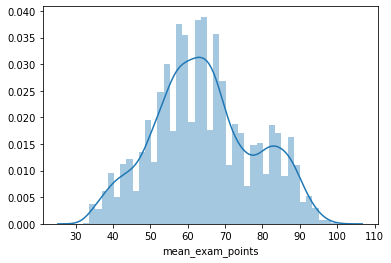

In [17]:
sns_plot = sns.distplot(TARGET)
fig = sns_plot.get_figure()

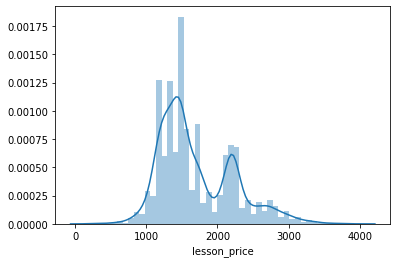

In [18]:
sns_plot = sns.distplot(data_train['lesson_price'])
fig = sns_plot.get_figure()

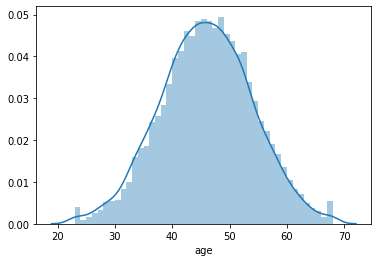

In [19]:
sns_plot = sns.distplot(data_train['age'])
fig = sns_plot.get_figure()

In [20]:
BASE_FEATURE_NAMES = data_train_base.columns.tolist()

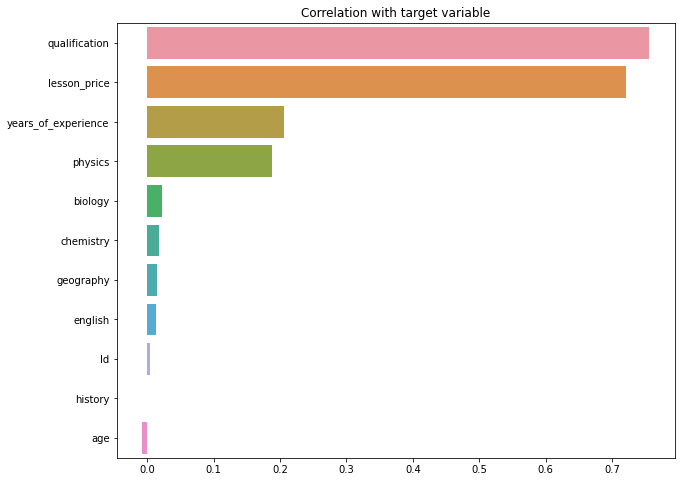

In [21]:
corr_with_target = data_train[BASE_FEATURE_NAMES + ['mean_exam_points']].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

Высокая корреляция у 2 факторов - квалификации и стоимости урока. 

Включу 3 признака - квалификацию, стоимость урока, года опыта в отдельный список  NUM_FEATURES

In [22]:
NUM_FEATURES = ['qualification', 'lesson_price', 'years_of_experience', 'physics']

Отнормирую эти данные

In [23]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [24]:
data_train_num = data_train.copy()
data_train_num_ft = data_train_num[NUM_FEATURES]
#data_train_st[NUM_FEATURES] = calc_std_feat(data_train_st[NUM_FEATURES])
data_train_st_num_ft = calc_std_feat(data_train_num_ft)
#data_train_st_num_features = data_train_st[NUM_FEATURES]

In [25]:
data_train_st_num_ft

,qualification,lesson_price,years_of_experience,physics
0,-0.908157,-0.569847,-1.121084,1.290930
1,1.616254,2.192654,1.135981,1.290930
2,-0.908157,-0.950881,-1.121084,-0.774558
3,-0.908157,-0.569847,1.700247,-0.774558
4,-0.908157,-0.379330,-0.556818,-0.774558
...,...,...,...,...
9995,0.354049,0.001705,-1.121084,1.290930
9996,0.354049,0.001705,-1.121084,-0.774558
9997,-0.908157,-0.855623,-0.556818,1.290930
9998,-0.908157,-1.141399,0.571714,-0.774558


In [26]:
data_train_st_num_ft_np = np.array(data_train_st_num_ft)

In [27]:
data_train_st_num_ft_np

array([[-0.90815668, -0.56984684, -1.12108404,  1.2909299 ],
       [ 1.61625383,  2.19265434,  1.13598067,  1.2909299 ],
       [-0.90815668, -0.95088148, -1.12108404, -0.77455794],
       ...,
       [-0.90815668, -0.85562282, -0.55681786,  1.2909299 ],
       [-0.90815668, -1.14139881,  0.57171449, -0.77455794],
       [-0.90815668, -0.47458818, -1.12108404, -0.77455794]])

In [28]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return ((sum((y - y_pred)**2)) / len(y))

In [29]:
def mserror_st(X, w, y_pred):
    y_pred = calc_std_feat(y_pred)
    y = X.dot(w)
    return ((sum((y - y_pred)**2)) / len(y))

In [30]:
data_train_st_num_ft_np[1]

array([1.61625383, 2.19265434, 1.13598067, 1.2909299 ])

In [31]:
TARGET = np.array(TARGET)

In [32]:
def fit(data, y, max_iter, eta, dim):
    w = np.zeros(dim)
    w_list = [w.copy()]
    errors = []
    #eta = 0.01
    #max_iter = 7000
    min_weight_dist = 1e-8
    weight_dist = np.inf
    iter_num = 0
    np.random.seed(1234)
     
    while weight_dist > min_weight_dist and iter_num < max_iter:

        train_ind = np.random.randint(data.shape[0])

        new_w = w - 2 * eta * np.sum(data[train_ind].T * (np.dot(data[train_ind], w) - y[train_ind]) / y.shape[0])

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        
        errors.append(mserror_st(data, new_w, y))

        #print(round(errors[-1], 4))

        iter_num += 1
        w = new_w

    w_list = np.array(w_list)
    #w_final = w_list[-1]
 
    print(iter_num)
    print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    return errors, w

In [33]:
errors, w = fit(data_train_st_num_ft_np, TARGET, 7000, 0.01, 4)

7000
В случае использования стохастического градиентного спуска функционал ошибки составляет 0.461


In [34]:
def predict(X, w):
    y_pred = X.dot(w)
    return y_pred

In [35]:
data_test = pd.read_csv(TEST_DATASET_PATH)
data_test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
data_test_num = data_test.copy()
data_test_num_ft = data_test_num[NUM_FEATURES]
data_test_st_num_ft = calc_std_feat(data_test_num_ft)

In [37]:
y_pred_train = predict(data_train_st_num_ft, w)
y_pred_test = predict(data_test_st_num_ft, w)

In [38]:
y_pred_train

0      -0.388200
1       1.850498
2      -1.114213
3      -0.163901
4      -0.777155
          ...   
9995    0.155973
9996   -0.456967
9997   -0.305557
9998   -0.668406
9999   -0.972871
Length: 10000, dtype: float64

In [39]:
y_pred_test

0      -0.694804
1       0.132015
2      -0.133658
3       2.210509
4       2.019204
          ...   
9995   -0.939310
9996    0.537709
9997   -0.333687
9998   -0.423812
9999    1.160678
Length: 10000, dtype: float64

In [40]:
def calc_std_feat_back(x, z):
    x_back = z * x.std() + x.mean()
    return x_back

In [41]:
y_pred_train_f = calc_std_feat_back(TARGET, y_pred_train)
y_pred_test_f = calc_std_feat_back(TARGET, y_pred_test)

In [42]:
y_pred_train_f

0       59.086071
1       89.389416
2       49.258652
3       62.122211
4       53.821112
          ...    
9995    66.452077
9996    58.155234
9997    60.204736
9998    55.293155
9999    51.171871
Length: 10000, dtype: float64

In [43]:
data_train

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,44.0,0.0,1700.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,78.0
9996,9996,51.0,0.0,1700.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0
9997,9997,34.0,1.0,1250.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0
9998,9998,33.0,3.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0


In [44]:
predictions = pd.DataFrame(index = data_test['Id'])
predictions['mean_exam_points'] = np.array(y_pred_test_f)
predictions

,mean_exam_points
Id,
10000,54.935825
10001,66.127772
10002,62.531580
10003,94.262577
10004,91.673034
...,...
19995,51.626159
19996,71.619306
19997,59.823964


In [45]:
predictions.to_csv('predictions_Iranti_v3.csv')